# Dog vs Cat



<h1 style="font-family: 'poppins'; font-weight: bold; color: #FFBB00;">👨‍💻Author: Umer Muhammad</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/umermuhammed) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/umer7359) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/umermuhammed/)  


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:umer.m6968@gmail.com)

Date: 3. March. 2024\
Dataset: [Dog vs Cat](https://www.kaggle.com/datasets/salader/dogs-vs-cats)

# Description

<img src="abcd.jpeg">

  
<p> This project involves building a Convolutional Neural Network (CNN) to classify images of cats and dogs. Using data augmentation techniques, the model is trained on a dataset of cat and dog images to prevent overfitting and improve generalization. The network architecture consists of multiple convolutional layers with batch normalization, max pooling, and dropout for regularization. The project also includes early stopping to optimize training and achieve better accuracy on unseen test data. The model achieves over 80% accuracy and can be further tuned for higher performance. </p>

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


C:\Users\hajiS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22


C:\Users\hajiS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 596s 1s/step - accuracy: 0.5691 - loss: 1.0388 - val_accuracy: 0.5765 - val_loss: 0.6731
Epoch 2/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 392s 782ms/step - accuracy: 0.6372 - loss: 0.6332 - val_accuracy: 0.5590 - val_loss: 0.6628
Epoch 3/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 383s 764ms/step - accuracy: 0.6814 - loss: 0.5983 - val_accuracy: 0.6425 - val_loss: 0.6417
Epoch 4/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 385s 768ms/step - accuracy: 0.6935 - loss: 0.5822 - val_accuracy: 0.5408 - val_loss: 1.2485
Epoch 5/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 384s 766ms/step - accuracy: 0.7217 - loss: 0.5446 - val_accuracy: 0.6515 - val_loss: 0.7255
Epoch 6/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 384s 765ms/step - accuracy: 0.7633 - loss: 0.4880 - val_accuracy: 0.7297 - val_loss: 0.5315
Epoch 7/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 382s 762ms/step - accuracy: 0.7886 - loss: 0.4539 - val_accuracy: 0.7632 - val_loss: 0.5641
Epoch 8/22
500/500 ━━━━━━━━━━━━━━━━━━━━ 384s 766ms/step - accuracy: 0.8080 - loss: 0.4247 

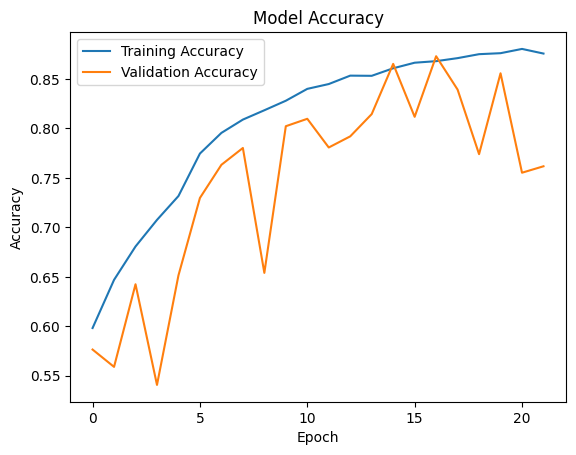

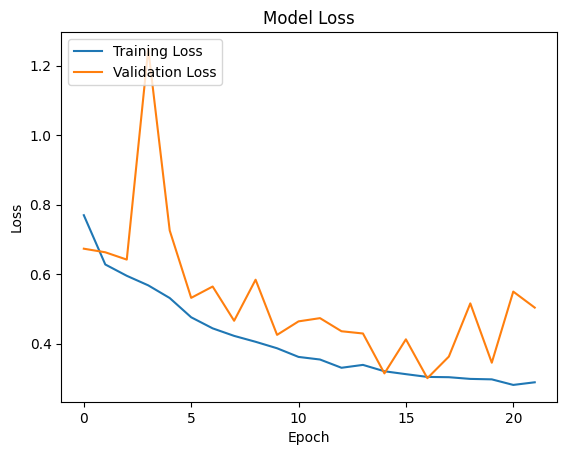

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set paths to training and testing data
train_dir = r"C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\Cat_or_Dog_image_classification_(CNN)\train"
test_dir = r"C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\Cat_or_Dog_image_classification_(CNN)\test"

# Set image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data Augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of training data for validation
)

# For the test set, we only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data from the directory with real-time augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load the validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build a CNN model
model = Sequential()

# Layer 1: Convolution + Batch Normalization + Pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Convolution + Batch Normalization + Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolution + Batch Normalization + Pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Add another convolutional layer to increase complexity
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.4))  # Reduced dropout to retain more information

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=22,  # Increased epochs
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


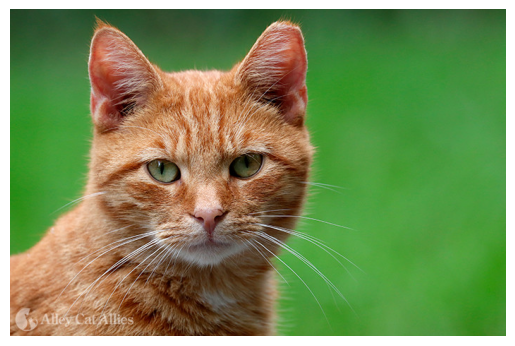

In [6]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
test_img = cv2.imread(r"C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\archive\cat_image.jpg")

# Convert BGR image (OpenCV default) to RGB for correct color display
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(test_img_rgb)
plt.axis('off')  # Optional: to hide axes
plt.show()


In [11]:
test_img.shape


(256, 256, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Prediction: Dog


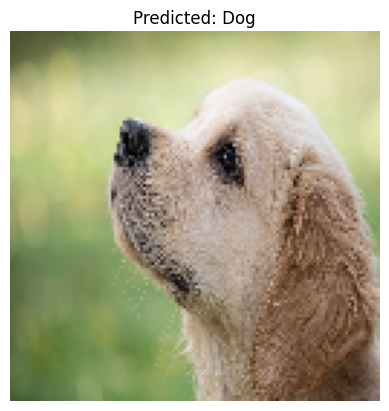

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model (assuming you have already saved the model after training)
from tensorflow.keras.models import load_model
model.save(r'C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\Cat_or_Dog_image_classification_(CNN)\dog_vs_cat_model.h5')

# Path to the model file (ensure this file exists)
model = load_model(r'C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\Cat_or_Dog_image_classification_(CNN)\dog_vs_cat_model.h5')


# Read the image using OpenCV
img_path = r"C:\Users\hajiS\OneDrive\Desktop\deeplearning\CNN\Cat_or_Dog_image_classification_(CNN)\dog54.jpg"
test_img = cv2.imread(img_path)

# Preprocess the image (resize to the same size used during model training, normalize)
img_size = (128, 128)  # or whatever size you used during training
test_img_resized = cv2.resize(test_img, img_size)

# Convert BGR to RGB for correct display (optional, depends on how your model trained)
test_img_rgb = cv2.cvtColor(test_img_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (convert to float and scale values between 0 and 1)
test_img_normalized = test_img_rgb / 255.0

# Add batch dimension since the model expects a batch (batch_size, height, width, channels)
test_img_normalized = np.expand_dims(test_img_normalized, axis=0)

# Make prediction using the model
prediction = model.predict(test_img_normalized)

# Assuming it's a binary classification model (dog or cat), use the output to interpret
if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

# Display the image with the prediction
plt.imshow(test_img_rgb)
plt.axis('off')
plt.title(f"Predicted: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")
plt.show()
